In [ ]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import scipy
import scipy.stats

from scipy.stats import ttest_ind , shapiro, levene, kstest, norm
from scipy.stats import brunnermunzel, ranksums
from pingouin import multivariate_normality
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

#Data Loading

In [ ]:
path = "Insert path to data"

This script assumes data is in stored in an excel document. See the "Example of Significance Testing Worksheet" within the folder to see how data is organized. Results or groups of data to be compared are placed in individual sheets. The cell below conditionally checks desired comparisons. The first choice is either class (classification) or a segmentation dataset (camer, foodseg, uec).

In my study, two algoritms were used on each dataset to compare performance results of the base dataset to an enhanced or combined dataset. The second choice is the selection of which algorithm's results to compare (first or second).

Change information as needed.

In [ ]:
#Classisification Base 0, 1
#Camer 4, 5
#FoodSeg 6, 7
#UEC 8, 9
#Classisification Ext 2, 3
#Segmentation Combo 10, 11
choice = 'class'
choice2 = 'second' #algorithm choice
x1 = 0
x2 = 0
x3 = 0
x4 = 0
column_names = []

if choice == 'camer' or choice == 'foodseg' or choice == 'uec':
    x3 = 10
    x4 = 11
    if choice == 'camer':
        x1 = 4
        x2 = 5
    elif choice == 'foodseg':
        x1 = 6
        x2 = 7
    elif choice == 'uec':
        x1 = 8
        x2 = 9
elif choice == 'class':
    x1 = 0
    x2 = 1
    x3 = 2
    x4 = 3

df1 = pandas.read_excel(path, sheet_name=x1, header=0);
df2 = pandas.read_excel(path, sheet_name=x2, header=0);
df3 = pandas.read_excel(path, sheet_name=x3, header=0);
df4 = pandas.read_excel(path, sheet_name=x4, header=0);

In [ ]:
if choice == 'class':
    df1 = df1.iloc[:,0:3]
    df2 = df2.iloc[:,0:3]
    df3 = df3.iloc[:,0:3]
    df4 = df4.iloc[:,0:3]
    column_names = ['Precision', 'Recall', 'Accuracy']
else:
    df1 = df1.iloc[:,[0,1,3]]
    df2 = df2.iloc[:,[0,1,3]]
    df3 = df3.iloc[:,[0,1,3]]
    df4 = df4.iloc[:,[0,1,3]]
    column_names = ['MeanJacard', 'Mean IoU', 'Eval IoU']

# Assumption Testing

##Normality Tests

head_num is the amount of rows to analyze. Set this value to be larger than rows if necessary. alpha for significance testing is utilized in multiple cells. Set independently is blocks of code if necessary.

Tests in this cell perform normality testing

###Kolmogorov-Smirnow and Shapiro-Wilk Normlity Testing

In [ ]:
dfCompare1 = 0
dfCompare2 = 0
head_num1 = 2000
head_num2 = 2000
alpha = 0.05
is_normal_1_1 = False
is_normal_1_2 = False
is_normal_1_3 = False
is_normal_2_1 = False
is_normal_2_2 = False
is_normal_2_3 = False


if choice2 == 'first':
    dfCompare1 = df1.head(head_num1)
    dfCompare2 = df3.head(head_num2)
elif choice2 == 'second':
    dfCompare1 = df2.head(head_num1)
    dfCompare2 = df4.head(head_num2)

print("Group Data1:\n")
for column in dfCompare1.columns:
    if pandas.api.types.is_numeric_dtype(dfCompare1[column]):
        stat = 0
        p = 0

        if(head_num1 >=50):
            stat, p = kstest(dfCompare1[column].dropna(), 'norm')
            print(f"\tKolmogorov-Smirnow for column: {column}")
        else:
            stat, p = shapiro(dfCompare1[column].dropna())
            print(f"\tShapiro-Wilk Test for column: {column}")

        print(f"\tStatistic: {stat:.5f}, p-value: {p}")


        if p > alpha:
            print("\tSample is Gaussian (fail to reject H0)")
            if column == 'Precision' or column == 'MeanJacard':
                is_normal_1_1=True
            elif column == 'Recall' or column == 'Mean IoU':
                is_normal_1_2=True
            elif column == 'Accuracy' or column == 'Eval IoU':
                is_normal_1_3=True
        else:
            print("\tSample does not look Gaussian (reject H0)")
        print("\t-------------------------------")

print("Group Data2:\n")
for column in dfCompare2.columns:
    if pandas.api.types.is_numeric_dtype(dfCompare2[column]):
        stat
        p
        if(head_num1 >=50):
            stat, p = kstest(dfCompare2[column].dropna(), 'norm')
            print(f"\tKolmogorov-Smirnow for column: {column}")
        else:
            stat, p = shapiro(dfCompare2[column].dropna())
            print(f"\tShapiro-Wilk Test for column: {column}")
        print(f"\tStatistic: {stat:.5f}, p-value: {p}")


        if p > alpha:
            print("\tSample is Gaussian (fail to reject H0)")
            if column == 'Precision' or column == 'MeanJacard':
                is_normal_2_1=True
            elif column == 'Recall' or column == 'MeanIoU':
                is_normal_2_2=True
            elif column == 'Accuracy' or column == 'Eval IoU':
                is_normal_2_3=True
        else:
            print("\tSample does not look Gaussian (reject H0)")
        print("\t-------------------------------")

Group Data1:

	Kolmogorov-Smirnow for column: Precision
	Statistic: 0.82399, p-value: 1.391689110330959e-71
	Sample does not look Gaussian (reject H0)
	-------------------------------
	Kolmogorov-Smirnow for column: Recall
	Statistic: 0.82320, p-value: 2.1856829668717544e-71
	Sample does not look Gaussian (reject H0)
	-------------------------------
	Kolmogorov-Smirnow for column: Accuracy
	Statistic: 0.82405, p-value: 1.3456518254732615e-71
	Sample does not look Gaussian (reject H0)
	-------------------------------
Group Data2:

	Kolmogorov-Smirnow for column: Precision
	Statistic: 0.81644, p-value: 1.6103068252912876e-51
	Sample does not look Gaussian (reject H0)
	-------------------------------
	Kolmogorov-Smirnow for column: Recall
	Statistic: 0.79704, p-value: 3.050426801821586e-48
	Sample does not look Gaussian (reject H0)
	-------------------------------
	Kolmogorov-Smirnow for column: Accuracy
	Statistic: 0.80545, p-value: 1.2521811247290238e-49
	Sample does not look Gaussian (

###Skew and Kurtosis Testing

In [ ]:
# Performing skewness and kurtosis check to check for approximate normality
def kurtosis_and_skew(df, column_name):
    kurtosis_bounds = 1
    skewness_bounds = 1
    kurtosis_value = df[column_name].kurtosis()
    skewness_value = df[column_name].skew()

    print(f"Kurtosis of {column_name}: {kurtosis_value}")
    print(f"Skewness of {column_name}: {skewness_value}")

    if ((kurtosis_value < kurtosis_bounds and
        kurtosis_value > kurtosis_bounds * -1) and
        (skewness_value < skewness_bounds and
        skewness_value > skewness_bounds * -1)):
        return True
    return False

In [ ]:
col_count = 0
print("Group1 Data")
for column in dfCompare1.columns:
    col_count += 1
    if col_count == 1:

        if kurtosis_and_skew(dfCompare1, column):
            print("Data is Roughly Normal")
            is_normal_1_1 = True
        else:
                print("Data is NOT Normal")
    elif col_count == 2:

        if kurtosis_and_skew(dfCompare1, column):
            print("Data is Roughly Normal")
            is_normal_1_2 = True
        else:
            print("Data is NOT Normal")
    elif col_count == 3:

        if kurtosis_and_skew(dfCompare1, column):
            print("Data is Roughly Normal")
            is_normal_1_3 = True
        else:
            print("Data is NOT Normal")

col_count = 0
print("\nGroup2 Data")
for column in dfCompare2.columns:
    col_count += 1
    if col_count == 1:

        if kurtosis_and_skew(dfCompare2, column):
            print("Data is Roughly Normal")
            is_normal_2_1 = True
        else:
            print("Data is NOT Normal")
    elif col_count == 2:

        if kurtosis_and_skew(dfCompare2, column):
            print("Data is Roughly Normal")
            is_normal_2_2 = True
        else:
            print("Data is NOT Normal")
    elif col_count == 3:

        if kurtosis_and_skew(dfCompare2, column):
            print("Data is Roughly Normal")
            is_normal_2_3 = True
        else:
            print("Data is NOT Normal")

Group1 Data
Kurtosis of Precision: -0.5080694839883364
Skewness of Precision: 0.2502437192944261
Data is Roughly Normal
Kurtosis of Recall: -0.023641413159254387
Skewness of Recall: 0.44508548319664204
Data is Roughly Normal
Kurtosis of Accuracy: -0.4637300879966926
Skewness of Accuracy: 0.32648485860623017
Data is Roughly Normal

Group2 Data
Kurtosis of Precision: 0.9836514212827288
Skewness of Precision: -1.4418064697483288
Data is NOT Normal
Kurtosis of Recall: 1.7248285133434251
Skewness of Recall: -1.7199121383809062
Data is NOT Normal
Kurtosis of Accuracy: 1.4738149195813879
Skewness of Accuracy: -1.637880974851636
Data is NOT Normal


###Q-Q plots to visually see normality


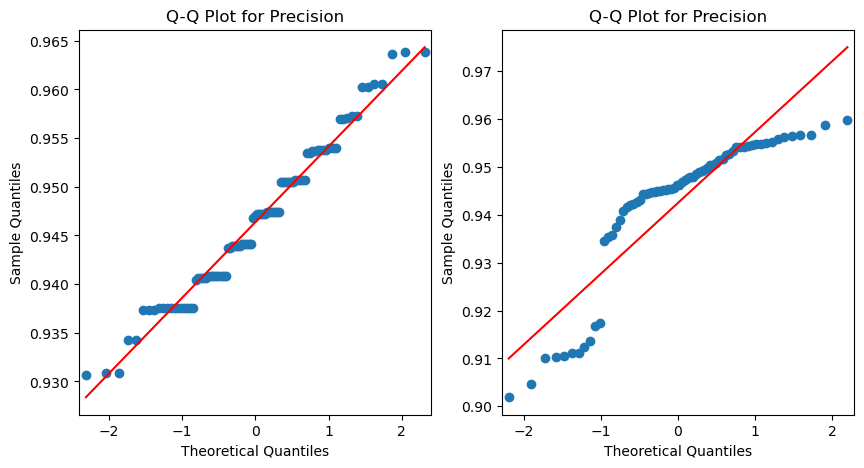

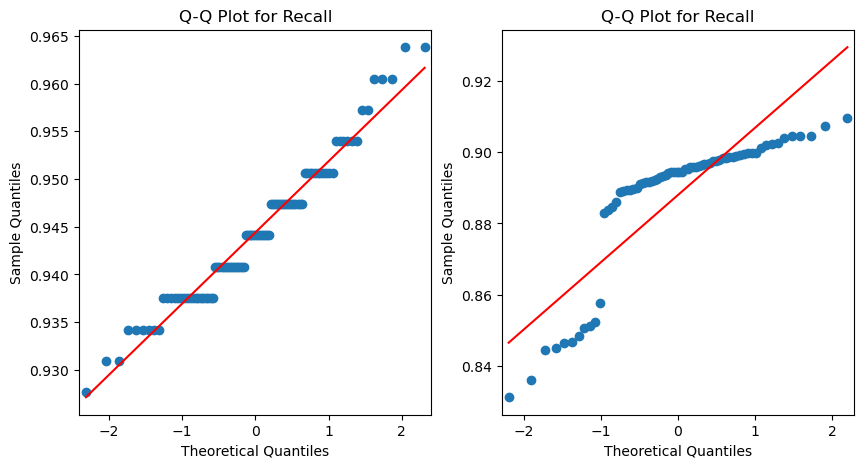

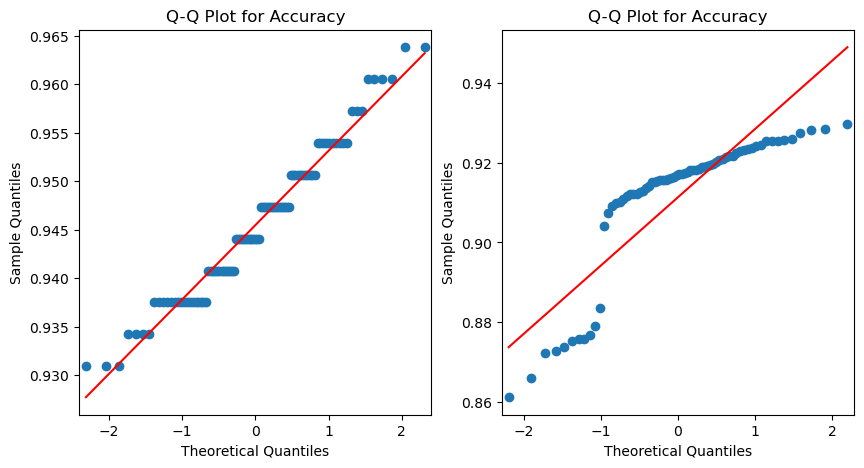

In [ ]:
for column in column_names:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sm.qqplot(dfCompare1[column], line= 's', ax=axes[0])
    axes[0].set_title(f"Q-Q Plot for {column}")
    sm.qqplot(dfCompare2[column], line= 's', ax=axes[1])
    axes[1].set_title(f"Q-Q Plot for {column}")
    plt.show()

##Variance Tests

###Levene Testing

In [ ]:
group_1 = 0
group_2 = 9
var_1_equality = False
var_2_equality = False
var_3_equality = False

for column in column_names:
    if pandas.api.types.is_numeric_dtype(dfCompare1[column]) and pandas.api.types.is_numeric_dtype(dfCompare2[column]):
        group_1 = dfCompare1[column]
        group_2 = dfCompare2[column]
        g1Var = group_1.var()
        g2Var = group_2.var()
        # define alpha
        alpha = 0.05
        # now we pass the groups and center value
        # from the following
        # ('trimmed mean', 'mean', 'median')
        w_stats, p_value = levene(group_1, group_2,
                                  center='mean')
        print(f"Column {column}")
        print(f"\tStatistic: {w_stats:.3f}, p-value: {p_value:.3f}")
        if p_value > alpha:
            print("\tWe do not reject the null hypothesis (Equality of Variance)")
            print(f"\tGroup 1 variance = {g1Var}")
            print(f"\tGroup 2 variance = {g2Var}")

            if column == 'Precision' or column == 'MeanJacard':
                var_1_equality =True
            elif column == 'Recall' or column == 'Mean Val IoU':
                var_2_equality =True
            elif column == 'Accuracy' or column == 'Eval IoU':
                var_3_equality =True

        else:
            print("\tReject the Null Hypothesis")
            print(f"\tGroup 1 variance = {g1Var}")
            print(f"\tGroup 2 variance = {g2Var}")

Column Precision
	Statistic: 14.670, p-value: 0.000
	Reject the Null Hypothesis
	Group 1 variance = 6.117169859995307e-05
	Group 2 variance = 0.0002226889411270589
Column Recall
	Statistic: 26.087, p-value: 0.000
	Reject the Null Hypothesis
	Group 1 variance = 5.642133980870699e-05
	Group 2 variance = 0.00036377261043263635
Column Accuracy
	Statistic: 19.178, p-value: 0.000
	Reject the Null Hypothesis
	Group 1 variance = 5.953094756405575e-05
	Group 2 variance = 0.00029721447510947484


##Significance Tests



def brunner_munzel_test(df1, df2):
    """Performs the Brunner-Munzel test on two columns of a DataFrame.

    Args:
        df: The input DataFrame.
        col1: The name of the first column.
        col2: The name of the second column.

    Returns:
        A tuple containing the test statistic and the p-value.
    """

    statistic, p_value = brunnermunzel(df1, df2, alternative='two-sided', nan_policy='omit')
    return statistic, p_value

In [ ]:
import numpy as np
from scipy.stats import norm

def brunner_munzel_test(x, y):
    """
    Perform the Brunner-Munzel test for two independent samples.

    Args:
        x (array-like): First sample.
        y (array-like): Second sample.

    Returns:
        statistic (float): The Brunner-Munzel test statistic.
        p_value (float): The p-value of the test.
    """

    n1 = len(x)
    n2 = len(y)
    N = n1 + n2

    # Combine and rank the data
    all_data = np.concatenate((x, y))
    ranks = np.argsort(all_data) + 1

    # Calculate mean ranks for each group
    rank_x = np.mean(ranks[:n1])
    rank_y = np.mean(ranks[n1:])

    # Calculate rank variances
    rank_x_star = np.mean(np.arange(1, n1 + 1))
    rank_y_star = np.mean(np.arange(1, n2 + 1))

    s_x_sq = np.sum((ranks[:n1] - rank_x - rank_x_star + (n1 + 1) / 2) ** 2) / (n1 - 1)
    s_y_sq = np.sum((ranks[n1:] - rank_y - rank_y_star + (n2 + 1) / 2) ** 2) / (n2 - 1)

    # Calculate pooled variance and test statistic
    sigma_hat_sq = (n1 + n2) * ((s_x_sq / n1 ** 2) + (s_y_sq / n2 ** 2))
    statistic = (rank_y - rank_x) / np.sqrt(sigma_hat_sq)

    # Calculate degrees of freedom
    df = ((s_x_sq / n1 ** 2) + (s_y_sq / n2 ** 2)) ** 2 / (
        (s_x_sq / n1 ** 2) ** 2 / (n1 - 1) + (s_y_sq / n2 ** 2) ** 2 / (n2 - 1)
    )

    # Calculate p-value
    p_value = 2 * (1 - norm.cdf(abs(statistic)))

    return statistic, p_value

###T-Test, Wilcoxon Rank-Sum, Welch's T-Test, and Brunner Munzel Testing

In [ ]:
#summary
#Are Column1 data between both dataframes of normal distribution
alpha = 0.05
if var_1_equality:
    if is_normal_1_1 and is_normal_2_1:
        print("Column 1 data is normal for both groups")
        print("variance equal between both groups")
        print("Test T-Test")
        # Conduct T-Test and print the result
        stat, p = ttest_ind(dfCompare1.iloc[:, 0].values, dfCompare2.iloc[:, 0].values, alternative='two-sided', equal_var = True)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif not is_normal_1_1 and not is_normal_2_1:
        print("Column 1 data is not normal between groups")
        print("variance equal between both groups")
        print("Test Wilcoxon-Rank Sums Test")
        stat, p = ranksums(dfCompare1.iloc[:, 0].values, dfCompare2.iloc[:, 0].values, alternative='two-sided')
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif (not is_normal_1_1 == is_normal_2_1):
        print("Column 1 data is normal for one group and not normal for another")
        print("variance equal between both groups")
        print("Test Wilcoxon-Rank Sums Test")
        stat, p = ranksums(dfCompare1.iloc[:, 0].values, dfCompare2.iloc[:, 0].values, alternative='two-sided')
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
else:
    if is_normal_1_1 and is_normal_2_1:
        print("Column 1 data is normal for both groups")
        print("varinace not equal between both groups")
        print("Test Welch's T-Test")
        # Conduct Welch's t-Test and print the result
        stat, p = ttest_ind(dfCompare1.iloc[:, 0].values, dfCompare2.iloc[:, 0].values, alternative='two-sided', equal_var = False)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif not is_normal_1_1 and not is_normal_2_1:
        print("Column 1 data is not normal between groups")
        print("varinace not equal between both groups")
        print("Test Brunner-Munzel")
        stat, p = brunner_munzel_test(dfCompare1.iloc[:, 0].values, dfCompare2.iloc[:, 0].values)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif (not is_normal_1_1 == is_normal_2_1):
        print("Column 1 data is normal for one group and not normal for another")
        print("varinace not equal between both groups")
        print("Test Brunner-Munzel")
        stat, p = brunner_munzel_test(dfCompare1.iloc[:, 0].values, dfCompare2.iloc[:, 0].values)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")


Column 1 data is normal for one group and not normal for another
varinace not equal between both groups
Test Brunner-Munzel
	The p-value for the significance is 0.6745934184401441
	The stat-value for the significance is 0.41985221403462025
	Non-significant


In [ ]:
#summary
#Are Column1 data between both dataframes of normal distribution
alpha = 0.05
if var_2_equality:
    if is_normal_1_2 and is_normal_2_2:
        print("Column 2 data is normal for both groups")
        print("variance equal between both groups")
        print("Test T-Test")
        # Conduct T-Test and print the result
        stat, p = ttest_ind(dfCompare1.iloc[:, 1].values, dfCompare2.iloc[:, 1].values, alternative='two-sided', equal_var = True)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif not is_normal_1_2 and not is_normal_2_2:
        print("Column 2 data is not normal between groups")
        print("variance equal between both groups")
        print("Test Wilcoxon Rank-Sum Test")
        stat, p = ranksums(dfCompare1.iloc[:, 1].values, dfCompare2.iloc[:, 1].values, alternative='two-sided')
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif (not is_normal_1_2 == is_normal_2_2):
        print("Column 2 data is normal for one group and not normal for another")
        print("variance equal between both groups")
        print("Test Wilcoxon-Rank Sums Test")
        stat, p = ranksums(dfCompare1.iloc[:, 1].values, dfCompare2.iloc[:, 1].values, alternative='two-sided')
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
else:
    if is_normal_1_2 and is_normal_2_2:
        print("Column 2 data is normal for both groups")
        print("varinace not equal between both groups")
        print("Test Welch's T-Test")
        # Conduct Welch's t-Test and print the result
        stat, p = ttest_ind(dfCompare1.iloc[:, 1].values, dfCompare2.iloc[:, 1].values, alternative='two-sided', equal_var = False)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif not is_normal_1_2 and not is_normal_2_2:
        print("Column 2 data is not normal between groups")
        print("varinace not equal between both groups")
        print("Test Brunner-Munzel")
        # Conduct Brunner-Munzel and print the result
        stat, p = brunner_munzel_test(dfCompare1.iloc[:, 1].values, dfCompare2.iloc[:, 1].values)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif (not is_normal_1_2 == is_normal_2_2):
        print("Column 2 data is normal for one group and not normal for another")
        print("varinace not equal between both groups")
        print("Test Brunner-Munzel")
        # Conduct Brunner-Munzel and print the result
        stat, p = brunner_munzel_test(dfCompare1.iloc[:, 1].values, dfCompare2.iloc[:, 1].values)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")

Column 2 data is normal for one group and not normal for another
varinace not equal between both groups
Test Brunner-Munzel
	The p-value for the significance is 8.197886813832156e-13
	The stat-value for the significance is -7.157823178355349
	Significant


In [ ]:
#summary
#Are Column1 data between both dataframes of normal distribution
alpha = 0.05
if var_3_equality:
    if is_normal_1_3 and is_normal_2_3:
        print("Column 3 data is normal for both groups")
        print("variance equal between both groups")
        print("Test T-Test")
        # Conduct T-Test and print the result
        stat, p = ttest_ind(dfCompare1.iloc[:, 2].values, dfCompare2.iloc[:, 2].values, alternative='two-sided', equal_var = True)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif not is_normal_1_3 and not is_normal_2_3:
        print("Column 3 data is not normal between groups")
        print("variance equal between both groups")
        print("Test Wilcoxon Rank-Sums Test")
        stat, p = ranksums(dfCompare1.iloc[:, 2].values, dfCompare2.iloc[:, 2].values, alternative='two-sided')
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif (not is_normal_1_3 == is_normal_2_3):
        print("Column 3 data is normal for one group and not normal for another")
        print("variance equal between both groups")
        print("Test Wilcoxon-Rank Sums Test")
        stat, p = ranksums(dfCompare1.iloc[:, 2].values, dfCompare2.iloc[:, 2].values, alternative='two-sided')
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")

else:
    if is_normal_1_3 and is_normal_2_3:
        print("Column 3 data is normal for both groups")
        print("varinace not equal between both groups")
        print("Test Welch's T-Test")
        # Conduct Welch's t-Test and print the result
        stat, p = ttest_ind(dfCompare1.iloc[:, 2].values, dfCompare2.iloc[:, 2].values, alternative='two-sided', equal_var = False)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif not is_normal_1_3 and not is_normal_2_3:
        print("Column 3 data is not normal between groups")
        print("varinace not equal between both groups")
        print("Test Brunner-Munzel")
        stat, p = brunner_munzel_test(dfCompare1.iloc[:, 2].values, dfCompare2.iloc[:, 2].values)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")
    elif (not is_normal_1_3 == is_normal_2_3):
        print("Column 3 data is normal for one group and not normal for another")
        print("varinace not equal between both groups")
        print("Test Brunner-Munzel")
        stat, p = brunner_munzel_test(dfCompare1.iloc[:, 2].values, dfCompare2.iloc[:, 2].values)
        print(f"\tThe p-value for the significance is {p}")
        print(f"\tThe stat-value for the significance is {stat}")
        if p > alpha:
            print("\tNon-significant")
        else:
            print("\tSignificant")

Column 3 data is normal for one group and not normal for another
varinace not equal between both groups
Test Brunner-Munzel
	The p-value for the significance is 9.876544027065393e-13
	The stat-value for the significance is -7.132229474935476
	Significant
